# Exploratory Data Analysis (EDA)
### Important findings
- 77.4% of the data is related to disasters.
- There are related texts classified as 2 (Probably an error. Must drop them).
- Texts related to aid and climate are the most common (this suggests that this dataset is biased towards countries that suffer these types of disasters).
- There are no child_alone related text (Should drop them as there is no impact in our model).

In [1]:
# import libraries
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
pd.reset_option('display.max_columns')

In [3]:
current_directory = os.getcwd()
dataset_directory = './dataset'
os.chdir(dataset_directory)

In [4]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql("SELECT * FROM messages", engine)

# Close the engine
engine.dispose()

#Go back to Original directory
os.chdir(current_directory)

In [5]:
#Lets check the data
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.related.sum() / df.shape[0]
#Maybe the data is not balanced. I must put equaly related and not related data
#77.4% of the data is related

0.7736496795849863

In [7]:
df.iloc[:,4:][df.related==0].sum().sum()
#All "related" = 0 (text not related) have features equal to 0

0

In [8]:
#Example of not related messages
for row in df[df.related==0].head(10).message:
    print(row)

Information about the National Palace-
I would like to receive the messages, thank you
I am in Petionville. I need more information regarding 4636
are you going to call me or do you want me to call ou? let me know?
I don't understand how to use this thing 4636.
Can you tell me about this service
Good evening, Radio one please. I would like information on Tiyous.
I'm here, I didn't find the person that I needed to send the pant by phone
I'm listening to you at Miraguan we asking the government to take change because one gallon gas is 80.
i am very happy, i hear god, religious hyme


In [9]:
#Lets check only the related information
related_messages = df[df.related==1]

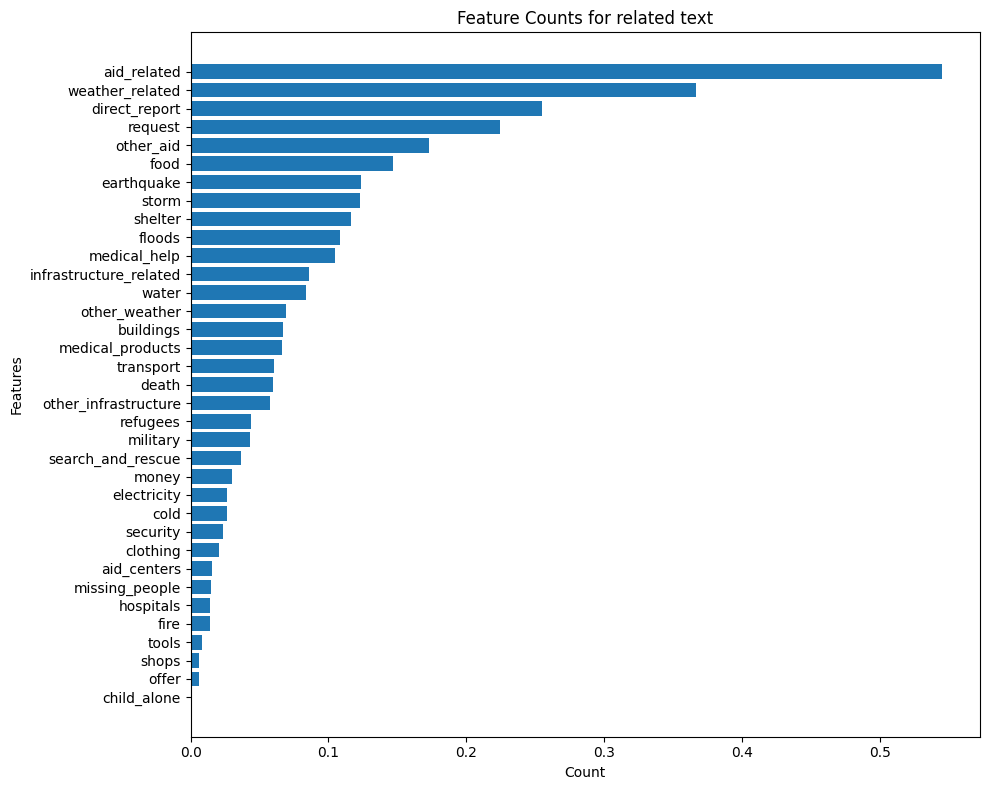

In [10]:
#Analyse related features proportion
related_messages_features = related_messages.iloc[:,5:]
count_features = related_messages_features.sum().sort_values() / related_messages_features.shape[0]

x = count_features.index
y = count_features.values

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(x, y)
ax.set_xlabel("Count")
ax.set_ylabel("Features")
ax.set_title("Feature Counts for related text")

plt.tight_layout()  # Adjust layout to make room for the y-axis labels
plt.show()

In [11]:
#Analyse related features classification proportion
count_features_classification = related_messages_features.apply(pd.Series.value_counts).fillna(0).astype(int).T/related_messages_features.shape[0]
(count_features_classification*100).round(2).sort_values(by=[1],ascending=False)
#The table shows that the more lines refer to a feature, the greater the chance that it has a balanced relationship between 0 and 1. 
# Therefore, the higher quality the data has for our model

,0,1
aid_related,45.44,54.56
weather_related,63.34,36.66
direct_report,74.51,25.49
request,77.52,22.48
other_aid,82.69,17.31
food,85.32,14.68
earthquake,87.67,12.33
storm,87.73,12.27
shelter,88.38,11.62
floods,89.17,10.83


In [12]:
#What are the unique terms in genre column?
df.genre.unique()

array(['direct', 'social', 'news'], dtype=object)

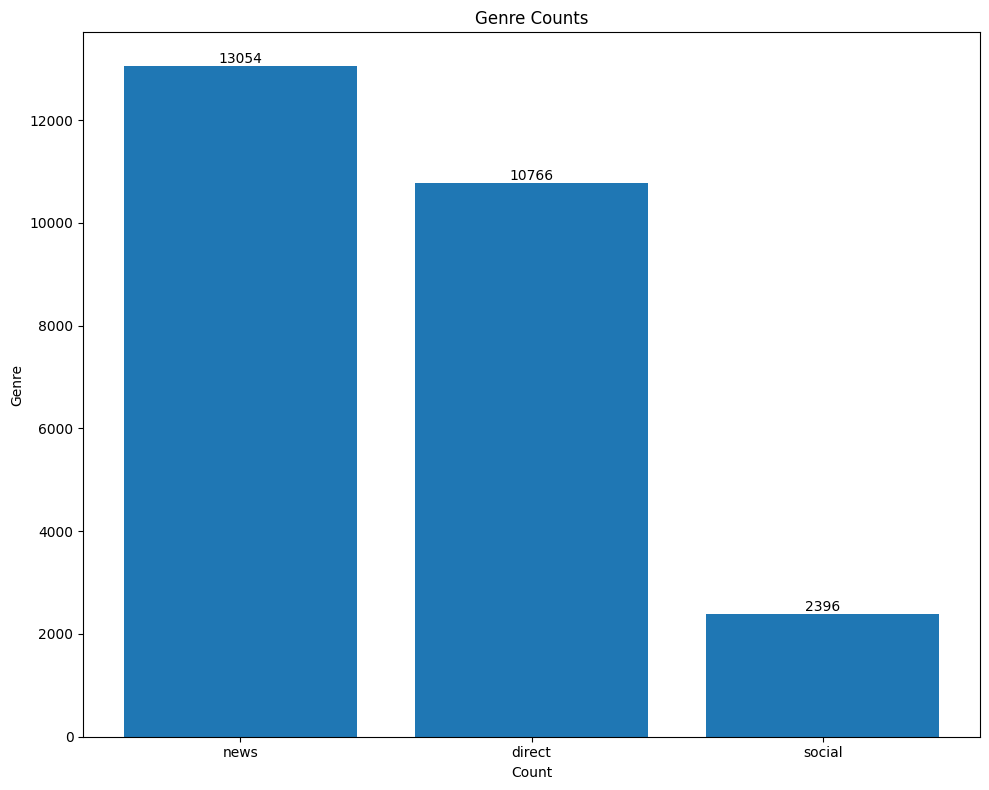

In [13]:
# Let's see the distribution in genre column
genre_count = df.genre.value_counts()

x = genre_count.index
y = genre_count.values

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(x, y)
ax.set_xlabel("Count")
ax.set_ylabel("Genre")
ax.set_title("Genre Counts")

# Adding labels to each bar
ax.bar_label(bars, labels=y, label_type='edge')

plt.tight_layout()  # Adjust layout to make room for the y-axis labels
plt.show()

In [14]:
df.pivot_table(index='related', columns='genre', aggfunc='size', fill_value=0)
#There are related classified as 2. Probably an error
#we might want to drop this rows first

genre,direct,news,social
related,,,
0,3452,2365,305
1,7182,10671,2053
2,132,18,38


In [15]:
# Pivot the table
pivot_table = df[df.related!=2].pivot_table(index='related', columns='genre', aggfunc='size', fill_value=0)
pivot_table

genre,direct,news,social
related,,,
0,3452,2365,305
1,7182,10671,2053


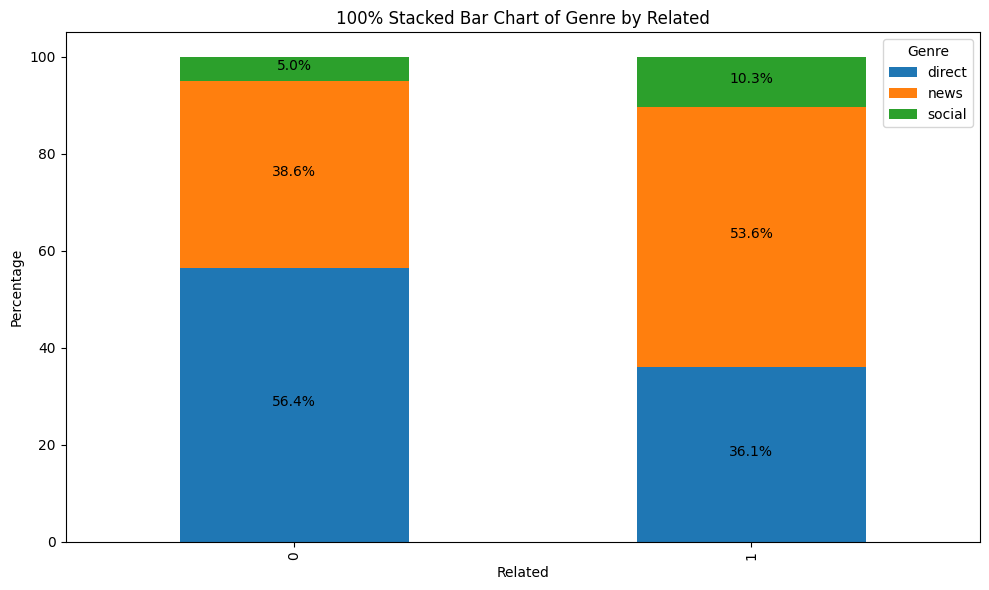

In [16]:
# Convert counts to percentages
percentage_table = (pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100).round(2)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bars = percentage_table.plot(kind='bar', stacked=True, ax=ax)

# Add labels to the bars
for container in bars.containers:
    bars.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=10, padding=2)

# Set the labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Related')
ax.set_title('100% Stacked Bar Chart of Genre by Related')
ax.legend(title='Genre')

# Show the plot
plt.tight_layout()
plt.show()